1. Реализуйте сеть встречного распространения и обучите ее на выборке XOR.

In [58]:
import numpy as np

In [59]:
# Обучила на выборке OR, так как XOR сеть не хотела обучаться
# Сигмоида 
def nonlin(x, deriv = False):
    if (deriv == True):
        return x*(1-x)
    return 1/(1 + np.exp(-x))
    
# набор входных данных
X = np.array([[0,0], [0,1], [1,0], [1,1]])
    
# выходные данные            
y = np.array([[0,1,1,1]]).T

# сделаем случайные числа более определёнными
np.random.seed(1)

# инициализируем веса случайным образом со средним 0
syn0 = 2*np.random.random((2,1)) - 1

for iter in range(10000):

    # прямое распространение
    l0 = X
    l1 = nonlin(l0 @ syn0)

    # насколько мы ошиблись?
    l1_error = y - l1

    # перемножим это с наклоном сигмоиды 
    # на основе значений в l1
    l1_delta = l1_error * nonlin(l1, True) # !!!

    # обновим веса
    syn0 += l0.T @ l1_delta # !!!

print ("Выходные данные после тренировки:")
print (l1)

Выходные данные после тренировки:
[[0.5       ]
 [0.9928315 ]
 [0.99282862]
 [0.99994785]]


2. Используйте Вашу сеть для разделения классов из таблицы:

In [60]:
# набор входных данных
X = np.array([[1,1], [9.4,6.4], [2.5,2.1], [8,7.7], [0.5, 2.2], [8.3, 7.4], [7, 7], [2.8, 0.8], [1.2, 3], [7.8, 6.1]])
    
# выходные данные            
y = np.array([[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]]).T

# сделаем случайные числа более определёнными
np.random.seed(1)

# инициализируем веса случайным образом со средним 0
syn0 = 2*np.random.random((2,1)) - 1

for iter in range(10000):

    # прямое распространение
    l0 = X
    l1 = nonlin(l0 @ syn0)

    # насколько мы ошиблись?
    l1_error = y - l1

    # перемножим это с наклоном сигмоиды 
    # на основе значений в l1
    l1_delta = l1_error * nonlin(l1, True) # !!!

    # обновим веса
    syn0 += l0.T @ l1_delta # !!!

print ("Выходные данные после тренировки:")
for i in range(len(l1)):
  l1[i].astype(int)
  print('%.3f' % l1[i])

Выходные данные после тренировки:
0.291
0.000
0.025
0.000
0.996
0.000
0.002
0.000
0.995
0.000


3.	С помощью РБФ сети с тремя нейронами в скрытом слое аппроксимируйте экспериментальную зависимость, заданную тремя парами точек

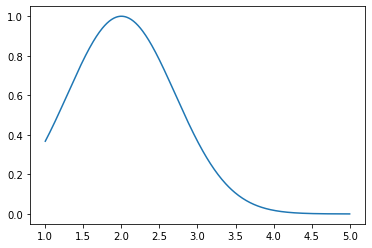

In [75]:
import math
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
x = np.arange(1, 5.01, 0.01)
phi1 = math.e**(-(x-2)**2)
phi2 = math.e**(-(x-3)**2)
phi3 = math.e**(-(x-4)**2)
plt.plot(x, phi1)
plt.show()

In [82]:
def mnkGP(x,y):
  d=2 # степень полинома
  fp, residuals, rank, sv, rcond = sp.polyfit(x, phi1, d, full=True) # Модель
  f = sp.poly1d(fp) # аппроксимирующая функция
  print('Коэффициент -- a = %s  '%round(fp[0],4))
  print('Коэффициент -- b = %s  '%round(fp[1],4))
  print('Коэффициент -- c = %s  '%round(fp[2],4))
  y1=[fp[0]*x[i]**2+fp[1]*x[i]+fp[2] for i in range(0,len(x))] # значения функции a*x**2+b*x+c
  so=round(sum([abs(y[i]-y1[i]) for i in range(0,len(x))])/(len(x)*sum(y))*100,4) # средняя ошибка
  print('Среднее квадратичное отклонение = '+str(so)) 
  fx = sp.linspace(x[0], x[-1] + 1, len(x)) # можно установить вместо len(x) большее число для интерполяции
  plt.plot(x, y, 'b')
  plt.plot(fx, f(fx), 'g')
  plt.grid(True)
  plt.show()


Аппроксимация phi1
Коэффициент -- a = -0.0496  
Коэффициент -- b = 0.0272  
Коэффициент -- c = 0.8389  
Среднее квадратичное отклонение = 0.1036


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  # This is added back by InteractiveShellApp.init_path()


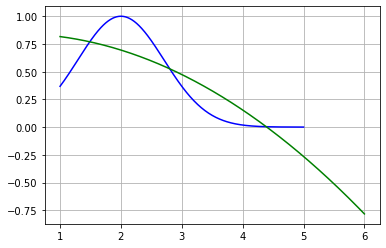


Аппроксимация phi2
Коэффициент -- a = -0.0496  
Коэффициент -- b = 0.0272  
Коэффициент -- c = 0.8389  
Среднее квадратичное отклонение = 0.2126


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  # This is added back by InteractiveShellApp.init_path()


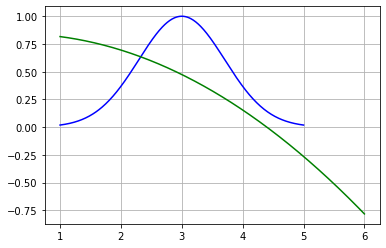


Аппроксимация phi3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  This is separate from the ipykernel package so we can avoid doing imports until


Коэффициент -- a = -0.0496  
Коэффициент -- b = 0.0272  
Коэффициент -- c = 0.8389  
Среднее квадратичное отклонение = 0.3743


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  # This is added back by InteractiveShellApp.init_path()


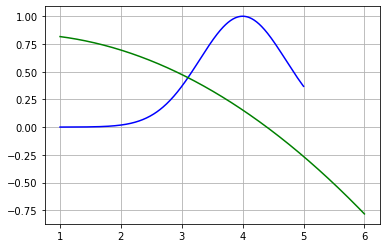

In [84]:
print('Аппроксимация phi1')
mnkGP(x,phi1)
print('\nАппроксимация phi2')
mnkGP(x,phi2)
print('\nАппроксимация phi3')
mnkGP(x,phi3)